## 1. ```Linear Regression```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Used_Bikes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df.duplicated().sum()

np.int64(25324)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [10]:
cat_col=df.select_dtypes(include="object")# this will help in finding columns with categorical value
cat_col.head()# this will print objects

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [11]:
cat_col=cat_col.drop(["bike_name","city"],axis=1)# in this we are dropping two columns
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [12]:
num_cal=df.select_dtypes(exclude="object")#this will find numerical columns but exclude categorical columns
num_cal.head() # this will print numerical value

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


#### methods to convert categorical data into numerical data
1. oneon encoding
2. label encoding

In [13]:
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [14]:
#1. one on encoding 

pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 2. ```label encoding```

In [15]:
cat_col["owner"].value_counts()


owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [16]:
dt={
    'First Owner':1,
    'Second Owner':2,
    'Third Owner':3,
    'Fourth Owner Or More':4
}


In [17]:
cat_col['owner']=cat_col["owner"].map(dt) # if we run twice it it will replace the value with null

In [18]:
cat_col.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [19]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [20]:
dt1={ i: key for key,i in enumerate(list(cat_col["brand"].unique()))
    }
dt1

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [21]:
cat_col['brand']=cat_col['brand'].map(dt1)

In [22]:
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [23]:
final_df=pd.concat([cat_col,num_cal],axis=1)

In [24]:
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [25]:
matrix=final_df.corr()# correlation
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


#### ```data divide= 20% data for model training and 80% data for model testing```

<Axes: >

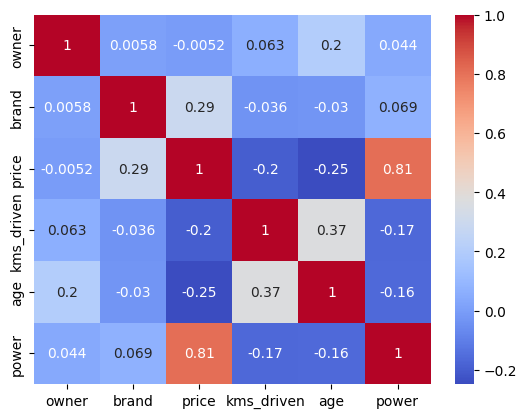

In [26]:
sns.heatmap(matrix,annot=True,cmap="coolwarm") # annot is used to print the values on the heatmap
# cmap is used for different colors

In [27]:
# divide the data into features like separate data into x and y
x=final_df.drop("price",axis=1)
print(x)
y=final_df["price"]
y

      owner  brand  kms_driven  age  power
0         1      0     17654.0  3.0  110.0
1         1      1     11000.0  4.0  350.0
2         1      2       110.0  8.0  675.0
3         1      0     16329.0  4.0  180.0
4         1      3     10000.0  3.0  150.0
...     ...    ...         ...  ...    ...
9362      1      5     48587.0  8.0  150.0
9369      1      6     60000.0  9.0  220.0
9370      1     14      3430.0  4.0  750.0
9371      1      6     21300.0  4.0  400.0
9372      1      6      7127.0  5.0  220.0

[7324 rows x 5 columns]


0        35000.0
1       119900.0
2       600000.0
3        65000.0
4        80000.0
          ...   
9362     25000.0
9369     35000.0
9370    450000.0
9371    139000.0
9372     80000.0
Name: price, Length: 7324, dtype: float64

In [28]:
import sklearn as sklearn


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_transform=sc.fit_transform(x_train)
x_test_transform=sc.transform(x_test)

In [31]:
# define your ann model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
x_train.shape

(5859, 5)

In [33]:
#initialising Sequential
model=Sequential()
# Initialize the model
# Input layer + first hidden layer
#model.add(Dense(    -->no of neurons -> activation -->input dimension ))

model.add(Dense(68, activation="relu", input_dim=x_train_transform.shape[1]))

# Hidden layers
model.add(Dense(32, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))

# Output layer
model.add(Dense(1))

import tensorflow as tf
import tensorflow.keras.backend as K


def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae","mse",r2_metric])

# Display model summary
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,721 (14.54 KB)

 Trainable params: 3,721 (14.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history=model.fit(x_train_transform,
                  y_train,
                  epochs=10,
                  validation_data=(x_test_transform,y_test),
                  )

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 19917897728.0000 - mae: 83840.0000 - mse: 19917897728.0000 - r2_metric: -1.1823 - val_loss: 27092490240.0000 - val_mae: 87993.4453 - val_mse: 27092490240.0000 - val_r2_metric: -1.0886
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 18351110144.0000 - mae: 78057.7812 - mse: 18351110144.0000 - r2_metric: -1.0700 - val_loss: 15574615040.0000 - val_mae: 48665.4531 - val_mse: 15574615040.0000 - val_r2_metric: 0.1971
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8725138432.0000 - mae: 37516.2383 - mse: 8725138432.0000 - r2_metric: 0.4473 - val_loss: 7034764800.0000 - val_mae: 35046.9258 - val_mse: 7034764800.0000 - val_r2_metric: 0.5951
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4362665472.0000 - mae: 30400.7012 - mse: 4362665472.0000 - r2_metric: 0.6252 - val_loss: 5099026944.0000 - val_mae: 31740.7617 - val_mse: 5099026944.0000 - val_r2_metric: 0.6722
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━

In [35]:
## prediction
y_pred=model.predict(x_test_transform)
prediction_label=(y_pred>0.5).astype(int).ravel()
prediction_label

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([1, 1, 1, ..., 1, 1, 1])

In [36]:
# to save model
model.save("linear_model.keras")

In [41]:
# If y_test is a DataFrame or 2D array, convert to 1D
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values.ravel()
elif hasattr(y_test, 'reshape'):
    y_test = y_test.reshape(-1)

# If y_pred is 2D from model.predict, flatten it
y_pred = y_pred.flatten()


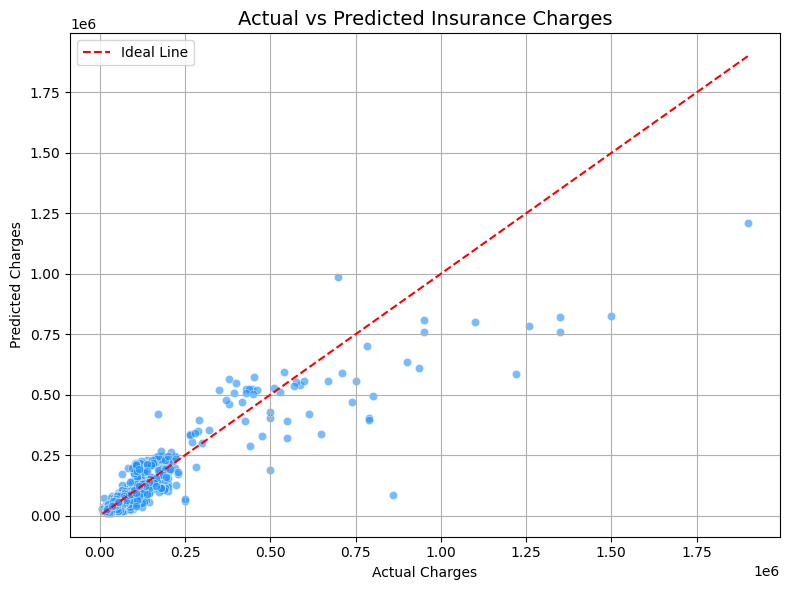

In [42]:
# Create a DataFrame for plotting

df_plot = pd.DataFrame({
    'Actual Charges': y_test,
    'Predicted Charges': y_pred
})

# Seaborn scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Actual Charges', y='Predicted Charges', color='dodgerblue', alpha=0.6)
sns.lineplot(x=df_plot['Actual Charges'], y=df_plot['Actual Charges'], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Insurance Charges', fontsize=14)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()